# Predicting Individual's Salary

**To be completed INDIVIDUALLY and due on March 31 at 3 pm.**

In this assignment, we will work on [US census data](http://www.google.com/url?q=http%3A%2F%2Fpoloclub.gatech.edu%2Fcse6242%2F2014fall%2Fhw4%2Fhw4-task1-data.tsv&sa=D&sntz=1&usg=AFQjCNGp2K-9_NTjdjqwi627u3kPcszXqw). The goal is to determine whether a person makes over $50K. The dataset was extracted from the 1994 US census data. You can find the details of the dataset [here](http://www.google.com/url?q=http%3A%2F%2Fpoloclub.gatech.edu%2Fcse6242%2F2014fall%2Fhw4%2Fhw4-task1-attributes.txt&sa=D&sntz=1&usg=AFQjCNEBbQwdw2e0dPqWhuQkomlP9hnDtw). The data is stored in a tab separated value file,  and each line represents a person.

This dataset contains categorical values. Most of the algorithms we learn in class can only handle numeric values and so we need to create a new variable (dummy variable) for every unique value of the categorical variables. To convert the categorical variable into dummy/indicator variables, we will use pandas.get_dummies. Here is an example on how to convert categorical variables to dummy variables:

In [1]:
import pandas as pd
raw_data = {'age': [23, 62, 31, 48, 59],
        'salary': [60000, 100000, 120000, 150000, 95000],
        'education': ['Bachelor', 'Masters', 'PhD', 'Jd', 'Masters']}
df = pd.DataFrame(raw_data, columns = ['age', 'salary', 'education'])
df_edu = pd.get_dummies(df['education'], prefix = 'edu')
df_new = pd.concat([df, df_edu], axis=1)
df_new = df_new.drop( ['education'], axis = 1 )
df_new

age  salary  edu_Bachelor  edu_Jd  edu_Masters  edu_PhD
0   23   60000             1       0            0        0
1   62  100000             0       0            1        0
2   31  120000             0       0            0        1
3   48  150000             0       1            0        0
4   59   95000             0       0            1        0

Now your job is to convert all categorical features in the dataset to indicator variables.

**(10 pts)**

In [2]:
import csv 

'''with open('hw4-task1-data.tsv','r') as file:
    for line in file:
        print (line)
        break'''
with open('hw4-task1-data.tsv','r') as file:
    data = [entry.strip().split('\t') for entry in file]
df = pd.DataFrame(data,columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation',\
             'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','50K'])
df_workclass = pd.get_dummies(df['workclass'],prefix = 'wc')
df_education = pd.get_dummies(df['education'],prefix = 'edu')
df_marital_status = pd.get_dummies(df['marital-status'],prefix = 'ms')
df_occupation = pd.get_dummies(df['occupation'],prefix = 'occ')
df_relationship = pd.get_dummies(df['relationship'],prefix = 'rl')
df_race = pd.get_dummies(df['race'],prefix = 'r')
df_sex = pd.get_dummies(df['sex'],prefix = 's')
df_native_country = pd.get_dummies(df['native-country'],prefix = 'nc')
#df_50k = pd.get_dummies(df['50k'],prefix = 'Bool')
df_final = pd.concat([df,df_workclass,df_education,df_marital_status,df_occupation,df_relationship,\
                     df_race,df_sex,df_native_country], axis = 1)
df_final = df_final.drop(['workclass','education','marital-status','occupation','relationship','race',\
                          'sex','native-country'],axis = 1)
del file
del data

del df_workclass
del df_education
del df_marital_status
del df_occupation
del df_relationship
del df_race
del df_sex
del df_native_country
#del df_50k
df_final


age  fnlwgt education-num capital-gain capital-loss hours-per-week  \
0      39   77516            13         2174            0             40   
1      50   83311            13            0            0             13   
2      38  215646             9            0            0             40   
3      53  234721             7            0            0             40   
4      28  338409            13            0            0             40   
5      37  284582            14            0            0             40   
6      49  160187             5            0            0             16   
7      52  209642             9            0            0             45   
8      31   45781            14        14084            0             50   
9      42  159449            13         5178            0             40   
10     37  280464            10            0            0             80   
11     30  141297            13            0            0             40   
12     23  122272            13            0            0             30   
13     32  205019            12            0            0             50   
14     40  121772            11            0            0             40   
15     34  245487             4            0            0             45   
16     25  176756             9            0            0             35   
17     32  186824             9            0            0             40   
18     38   28887             7            0            0             50   
19     43  292175            14            0            0             45   
20     40  193524            16            0            0             60   
21     54  302146             9            0            0             20   
22     35   76845             5            0            0             40   
23     43  117037             7            0         2042             40   
24     59  109015             9            0            0             40   
25     56  216851            13            0            0             40   
26     19  168294             9            0            0             40   
27     54  180211            10            0            0             60   
28     39  367260             9            0            0             80   
29     49  193366             9            0            0             40   
...    ..     ...           ...          ...          ...            ...   
46480  21  198259             9            0            0             30   
46481  57  161944            10         7688            0             60   
46482  51   29887            13            0         1590             40   
46483  37  238980            14            0            0             42   
46484  42  275677            11            0            0             50   
46485  32   24529            11         5178            0             60   
46486  51  311631            13            0            0             40   
46487  24  374763             7            0            0             40   
46488  25  242136             9            0            0             40   
46489  31  112115             9            0            0             40   
46490  49   77132             9            0            0             40   
46491  81   26711            11         2936            0             20   
46492  60  117909            11         7688            0             40   
46493  38  149347            14            0            0             50   
46494  43   23157            14            0         1902             50   
46495  23   93977             9            0            0             40   
46496  73  159691            10            0            0             40   
46497  35  176967            10            0            0             40   
46498  66  344436             9            0            0              8   
46499  40  202168            15        15024            0             55   
46500  51   82720             9            0          

Now that we know how to convert categorical variables to numerical dummy variables, we can use the algorithms we learned in the class. For the first part, we will use KNeighborsClassifier.

KNeighborsClassifier is an instant-based classification which simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point.

Report the accuracy of your prediction.

**(20 pts)**

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing


df_train, df_test = train_test_split(df_final, test_size = 0.2)
df_50kTrain = df_train['50K']
df_train = df_train.drop(['50K'],axis = 1)

df_50kTest = df_test['50K']
df_test = df_test.drop(['50K'],axis = 1)


proc_train = preprocessing.scale(df_train, axis=0)
proc_test = preprocessing.scale(df_test, axis=0)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
results = []
max_success = 0
succ_k = 0
LowK = 2
HighK = 10

for k in range(LowK, HighK):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(proc_train,df_50kTrain)
    Pred_KNN = KNN.predict(proc_test)

    total_count = 0
    success_count = 0
    for pred in Pred_KNN:
        total_count = total_count+1
        if pred == df_50kTest.iloc[total_count-1]:
            success_count = success_count+1
    overall = 100.0*success_count/total_count
    print(k)
    if overall>max_success:
        max_success = overall
        succ_k = k
    results.append(overall)


2
3
4
5
6
7
8
9


The overall highest success is 81.982 percent for 7 nearest neighbors


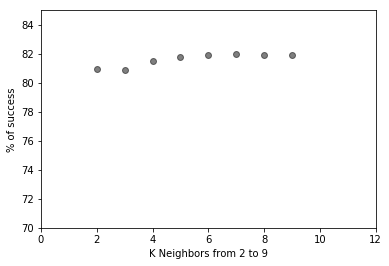

In [12]:
plt.xlim([LowK-2, HighK+2])
plt.ylim([70, 85])
plt.scatter(range(LowK,HighK), results, color = ['black'], alpha = .5)
plt.xlabel('K Neighbors from %r to %r' % (LowK,HighK-1))
plt.ylabel('% of success')
print ("The overall highest success is %5.3f percent for %r nearest neighbors" % (max_success, succ_k))
# however k-nearest neighbors performs (processing wise) best with lower number of neighbors.
#As such, I would reccomend using k = 4  , since it has similar results with much lower cost.

For this part of the homework, we will use [Decision Trees](http://scikit-learn.org/stable/modules/tree.html) to determine a person makes over $50K. Report accuracy score using decision trees. 

Compare your results with the results you obtained in Part 1.

**(20 pts)**


In [10]:
from sklearn import tree
CLF = tree.DecisionTreeClassifier()
CLF = CLF.fit(proc_train, df_50kTrain)
Pred_CLF = CLF.predict(proc_test)

In [11]:
total_count = 0
success_count = 0
for pred in Pred_CLF:
    total_count = total_count+1
    if pred == df_50kTest.iloc[total_count-1]:
        success_count = success_count+1
print ("The overall success is %5.3f percent for decision trees" % (100.0*success_count/total_count))
# Note that this is overall much higher than our result of part 1. This implies that on our data,
# decision trees is a much more effective method. Furthermore, it also implies that the assumptions
# of k-nearest neighbors (that the nearest neighbors have similar outcomes), do not hold to the same
# degree that the assumptions of decision trees hold (that a simple partions of our sample space is
# an effective predictors of the outcome of interest). This means that decision trees is a good
# choice for our final method, or we could use these results to inform our decision on other methods.

The overall success is 79.607 percent for decision trees


----------